## Preprocessing Data
[Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
# remove id column
data.drop(data.filter(regex = "id"), axis = 1, inplace = True)
# suffle dataset
data = data.sample(frac = 1).reset_index(drop = True)
# remove NaN rows
data = data.dropna()

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,78.0,0,0,Yes,Self-employed,133.19,23.6,formerly smoked,1
1,Male,55.0,0,0,Yes,Govt_job,97.40,44.6,formerly smoked,0
2,Female,52.0,1,0,Yes,Self-employed,233.29,48.9,never smoked,1
3,Female,15.0,0,0,No,children,114.53,29.1,Unknown,0
4,Female,82.0,1,1,Yes,Govt_job,215.94,27.9,formerly smoked,1


In [59]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "avg_glucose_level", "bmi"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "smoking_status"])
)

# create X and y value
X = data.drop("stroke", axis = 1)
y = data["stroke"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

# fit the column transformer
ct.fit(X_train)

# transfor train and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [60]:
X_train_normal[0]

array([0.84021632, 0.18026346, 0.17647059, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ])

In [61]:
X_test_normal[0]

array([0.91396264, 0.86960943, 0.25882353, 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ])

## Build a neural network

In [75]:
# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_1 = model_1.fit(X_train_normal, y_train, callbacks = [lr_scheduler], epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6718 - accuracy: 0.5505 - lr: 1.0000e-04
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5505 - lr: 1.1220e-04
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.5530 - lr: 1.2589e-04
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5606 - lr: 1.4125e-04
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.5606 - lr: 1.5849e-04
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5732 - lr: 1.7783e-04
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5732 - lr: 1.9953e-04
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.5682 - lr: 2.2387e-04
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss:

### Try to find the best learning rate

Text(0.5, 1.0, 'Learning rate vs Loss')

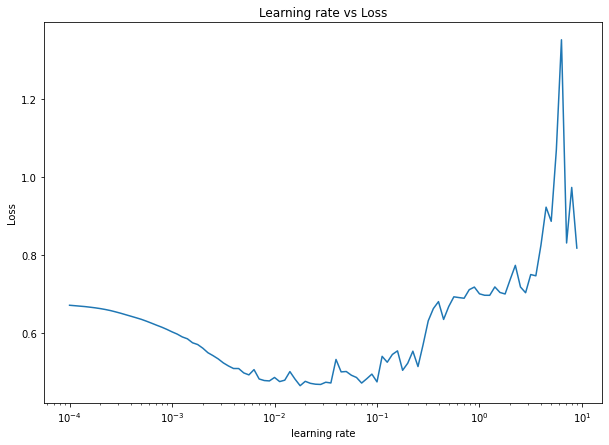

In [76]:
# plot the learning rate vs the loss to find where the loss decrease fastest (penurunan loss tercepat ada di learning rate yang mana?)
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [77]:
# try a higher ideal learning rate with the same model as before

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6160 - accuracy: 0.6465
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.6869
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7146
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.6919
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7247
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7273
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7323
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7247
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7601
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7273
Epoch 11/

In [78]:
model_1.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.4286


[0.8435613512992859, 0.4285714328289032]

In [79]:
model_2.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.4171 - accuracy: 0.6714


[1.4171350002288818, 0.6714285612106323]

## Confusion Matrix

In [80]:
# make predictions
y_preds = model_2.predict(X_test_normal)
y_preds

3/3 [==============================] - 0s 4ms/step


array([[9.99868691e-01],
       [5.42717040e-01],
       [5.03852606e-01],
       [8.61836195e-01],
       [5.42717040e-01],
       [9.90649939e-01],
       [9.99998689e-01],
       [5.42717040e-01],
       [3.39842238e-03],
       [5.98307699e-04],
       [9.99948382e-01],
       [5.42717040e-01],
       [4.49043931e-03],
       [1.72939315e-01],
       [4.77458455e-11],
       [1.16992407e-01],
       [5.42717040e-01],
       [5.42717040e-01],
       [5.42717040e-01],
       [9.83628750e-01],
       [9.99496877e-01],
       [4.40352589e-01],
       [2.34140828e-02],
       [3.20660323e-02],
       [4.40352589e-01],
       [5.80574162e-02],
       [3.46751362e-01],
       [5.42717040e-01],
       [5.42717040e-01],
       [5.42717040e-01],
       [1.52571863e-06],
       [5.42717040e-01],
       [5.42717040e-01],
       [3.86030413e-03],
       [6.01111613e-02],
       [9.99896467e-01],
       [7.52987087e-01],
       [2.76543344e-10],
       [9.17888045e-01],
       [1.02851994e-03],


In [81]:
# convert to binary format
y_preds = tf.round(y_preds)
y_preds

<tf.Tensor: shape=(70, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [82]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
confusion_matrix(y_test, y_preds)

array([[23, 17],
       [ 6, 24]])

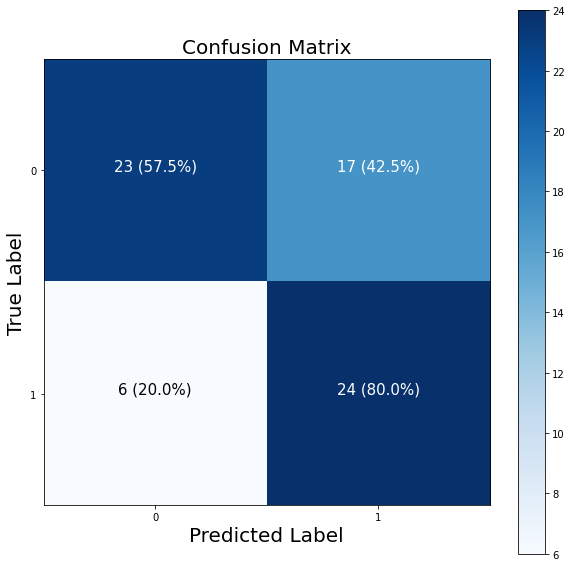

In [83]:
# prettify the confusion matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools

figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

# prettify it
fig, ax = plt.subplots(figsize = figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes 
classes = False
labels = np.arange(cm.shape[0])

# label the axes
ax.set(title = "Confusion Matrix", 
       xlabel = "Predicted Label", 
       ylabel = "True Label", 
       xticks = np.arange(n_classes), 
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)